In [3]:
import sys
from pathlib import Path

# Ubicación del notebook
NOTEBOOK_DIR = Path.cwd()

# Raíz del proyecto = subir un nivel desde Notebooks/
PROJECT_ROOT = NOTEBOOK_DIR.parent

# Añadir raíz del proyecto al sys.path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Proyecto raíz detectado:", PROJECT_ROOT)

Proyecto raíz detectado: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.paths import DATA_DIR, FIG_DIR
from utils.loader import load_csv, save_csv
from utils.cleaning import normalize_market_timeseries
from utils.plotting import (
    compare_summaries,
    plot_before_after_timeseries,
    plot_before_after_corr,
    show_side_by_side, 
    show_heads_by_ticker
)


END_DATE   = "2025-09-05"

In [5]:
#Cargar datos crudos
df_raw = load_csv(DATA_DIR / "raw_market_data.csv")

#Ejecutamos el pipeline de limpieza y normalización
market_df_clean,meta = normalize_market_timeseries(df_raw, END_DATE, strict=True)

In [10]:
#Creamos los reportes antes vs despues de la limpieza
sumary = compare_summaries(df_raw, market_df_clean)

#Guardamos el reporte sucio
sumary_raw = sumary["range_raw"]

#Guardamos el reporte limpio
sumary_clean = sumary["range_clean"]

show_side_by_side(sumary_raw, sumary_clean, title_before= "Stats por ticker - Datos Crudos", title_after="Stats por ticker - Datos Limpios")

ticker,first_date,last_date,n_rows,n_missing,mean,var,std,asset_class,currency
BTC-USD,2015-01-02,2025-09-04,3899,0,25275.675567,8.586713e+08,29303.094403,Crypto,USD
EUNL.DE,2015-01-02,2025-09-04,3899,1184,60.981730,4.181165e+02,20.447897,ETF,EUR
QQQ,2015-01-02,2025-09-04,3899,1215,254.726724,1.780463e+04,133.433991,ETF,USD
TSLA,2015-01-02,2025-09-04,3899,1215,128.394225,1.480080e+04,121.658539,Stock,USD
V,2015-01-02,2025-09-04,3899,1215,173.972896,6.396600e+03,79.978746,Stock,USD
VOO,2015-01-02,2025-09-04,3899,1215,301.352443,1.444831e+04,120.201132,ETF,USD
XAR,2015-01-02,2025-09-04,3899,1215,99.010665,1.379816e+03,37.145879,ETF,USD
XRP-USD,2015-01-02,2025-09-04,3899,1042,0.723592,4.510305e-01,0.671588,Crypto,USD
ticker,first_date,last_date,n_rows,n_missing,mean,var,std,asset_class,currency
BTC-USD,2017-11-09,2025-09-04,1931,0,34100.146852,8.748030e+08,29577.069272,Crypto,USD


In [12]:
"""Comparativa de series temporales antes y después de la limpieza"""

show_heads_by_ticker(df_raw, market_df_clean, n=10)

date,ticker,asset_class,close,currency
2015-01-02,BTC-USD,Crypto,315.032013,USD
2015-01-03,BTC-USD,Crypto,281.082001,USD
2015-01-04,BTC-USD,Crypto,264.195007,USD
2015-01-05,BTC-USD,Crypto,274.473999,USD
2015-01-06,BTC-USD,Crypto,286.188995,USD
2015-01-07,BTC-USD,Crypto,294.337006,USD
2015-01-08,BTC-USD,Crypto,283.348999,USD
2015-01-09,BTC-USD,Crypto,290.407990,USD
2015-01-10,BTC-USD,Crypto,274.795990,USD
2015-01-11,BTC-USD,Crypto,265.660004,USD


date,ticker,asset_class,close,currency
2015-01-02,EUNL.DE,ETF,34.259998,EUR
2015-01-03,EUNL.DE,ETF,NaN,EUR
2015-01-04,EUNL.DE,ETF,NaN,EUR
2015-01-05,EUNL.DE,ETF,33.939999,EUR
2015-01-06,EUNL.DE,ETF,33.529999,EUR
2015-01-07,EUNL.DE,ETF,34.060001,EUR
2015-01-08,EUNL.DE,ETF,34.770000,EUR
2015-01-09,EUNL.DE,ETF,34.410000,EUR
2015-01-10,EUNL.DE,ETF,NaN,EUR
2015-01-11,EUNL.DE,ETF,NaN,EUR


date,ticker,asset_class,close,currency
2015-01-02,QQQ,ETF,94.906540,USD
2015-01-03,QQQ,ETF,NaN,USD
2015-01-04,QQQ,ETF,NaN,USD
2015-01-05,QQQ,ETF,93.514389,USD
2015-01-06,QQQ,ETF,92.260536,USD
2015-01-07,QQQ,ETF,93.449852,USD
2015-01-08,QQQ,ETF,95.238480,USD
2015-01-09,QQQ,ETF,94.611549,USD
2015-01-10,QQQ,ETF,NaN,USD
2015-01-11,QQQ,ETF,NaN,USD


date,ticker,asset_class,close,currency
2015-01-02,TSLA,Stock,14.620667,USD
2015-01-03,TSLA,Stock,NaN,USD
2015-01-04,TSLA,Stock,NaN,USD
2015-01-05,TSLA,Stock,14.006000,USD
2015-01-06,TSLA,Stock,14.085333,USD
2015-01-07,TSLA,Stock,14.063333,USD
2015-01-08,TSLA,Stock,14.041333,USD
2015-01-09,TSLA,Stock,13.777333,USD
2015-01-10,TSLA,Stock,NaN,USD
2015-01-11,TSLA,Stock,NaN,USD


date,ticker,asset_class,close,currency
2015-01-02,V,Stock,61.340961,USD
2015-01-03,V,Stock,NaN,USD
2015-01-04,V,Stock,NaN,USD
2015-01-05,V,Stock,59.986954,USD
2015-01-06,V,Stock,59.600414,USD
2015-01-07,V,Stock,60.398949,USD
2015-01-08,V,Stock,61.209026,USD
2015-01-09,V,Stock,60.301727,USD
2015-01-10,V,Stock,NaN,USD
2015-01-11,V,Stock,NaN,USD


date,ticker,asset_class,close,currency
2015-01-02,VOO,ETF,156.158112,USD
2015-01-03,VOO,ETF,NaN,USD
2015-01-04,VOO,ETF,NaN,USD
2015-01-05,VOO,ETF,153.414612,USD
2015-01-06,VOO,ETF,151.906036,USD
2015-01-07,VOO,ETF,153.804108,USD
2015-01-08,VOO,ETF,156.506287,USD
2015-01-09,VOO,ETF,155.188354,USD
2015-01-10,VOO,ETF,NaN,USD
2015-01-11,VOO,ETF,NaN,USD


date,ticker,asset_class,close,currency
2015-01-02,XAR,ETF,48.900848,USD
2015-01-03,XAR,ETF,NaN,USD
2015-01-04,XAR,ETF,NaN,USD
2015-01-05,XAR,ETF,48.114243,USD
2015-01-06,XAR,ETF,47.897251,USD
2015-01-07,XAR,ETF,48.064510,USD
2015-01-08,XAR,ETF,49.135937,USD
2015-01-09,XAR,ETF,48.823994,USD
2015-01-10,XAR,ETF,NaN,USD
2015-01-11,XAR,ETF,NaN,USD


date,ticker,asset_class,close,currency
2015-01-02,XRP-USD,Crypto,NaN,USD
2015-01-03,XRP-USD,Crypto,NaN,USD
2015-01-04,XRP-USD,Crypto,NaN,USD
2015-01-05,XRP-USD,Crypto,NaN,USD
2015-01-06,XRP-USD,Crypto,NaN,USD
2015-01-07,XRP-USD,Crypto,NaN,USD
2015-01-08,XRP-USD,Crypto,NaN,USD
2015-01-09,XRP-USD,Crypto,NaN,USD
2015-01-10,XRP-USD,Crypto,NaN,USD
2015-01-11,XRP-USD,Crypto,NaN,USD


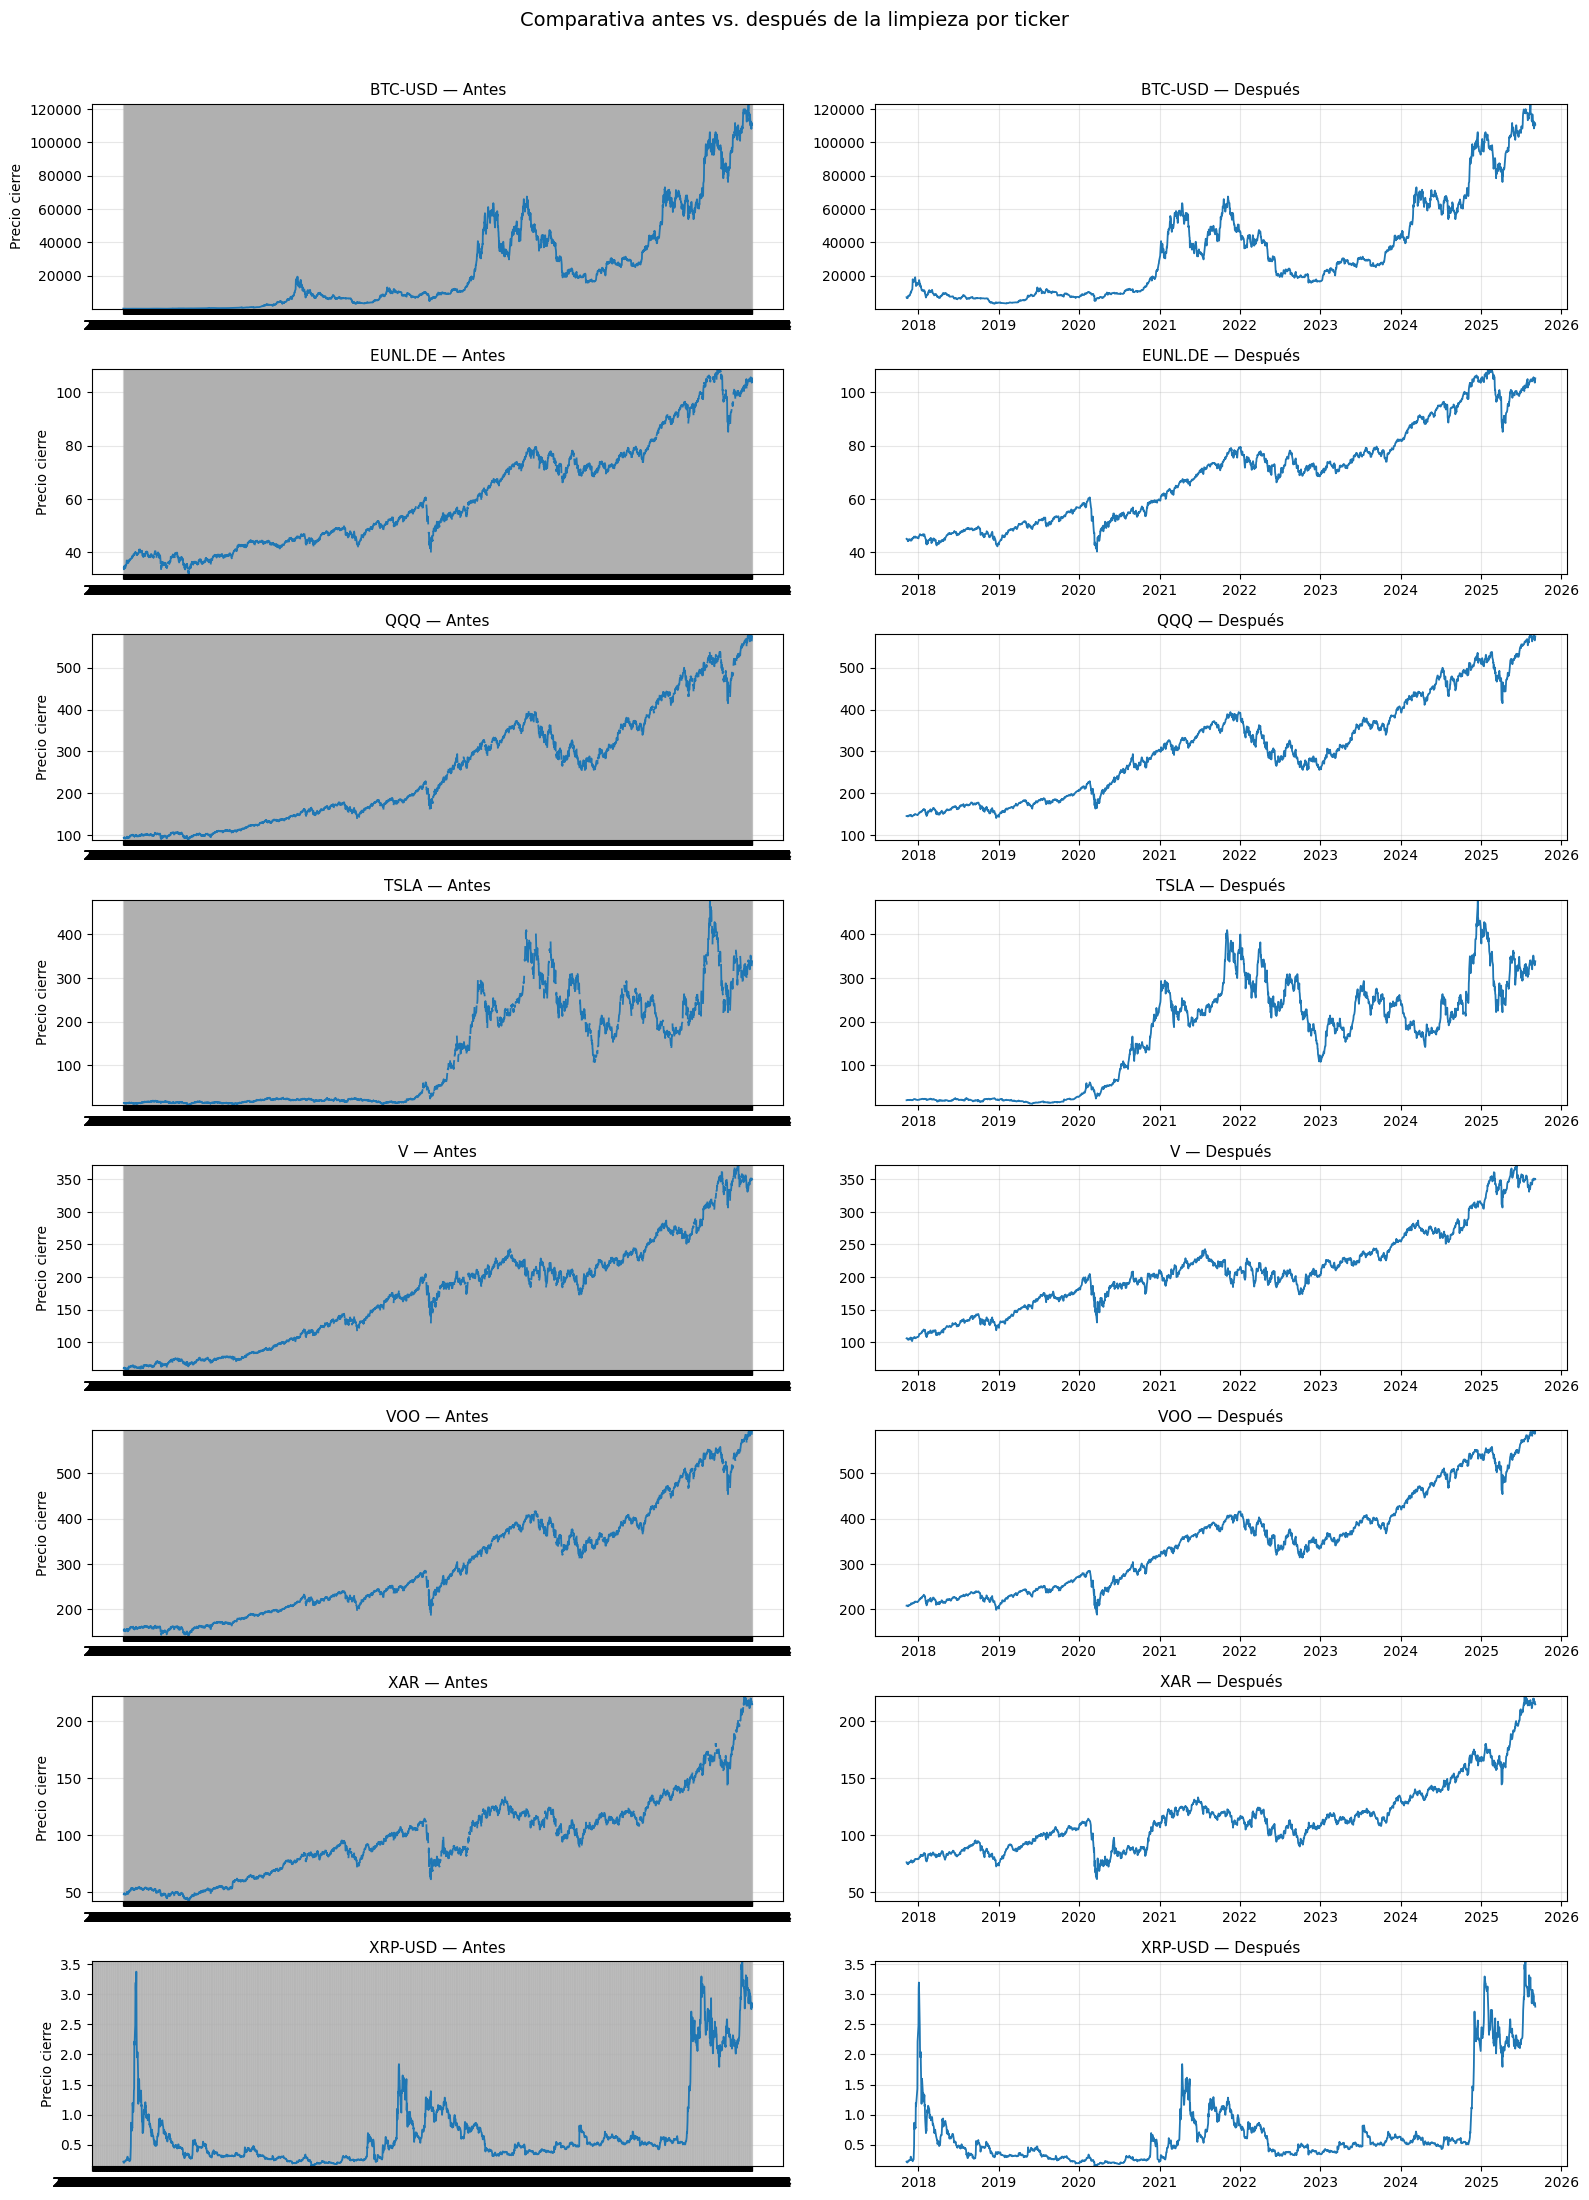

In [13]:
"""" Comparative de graficas por ticker antes y despues de la limpieza """

plot_before_after_timeseries(df_raw, market_df_clean)

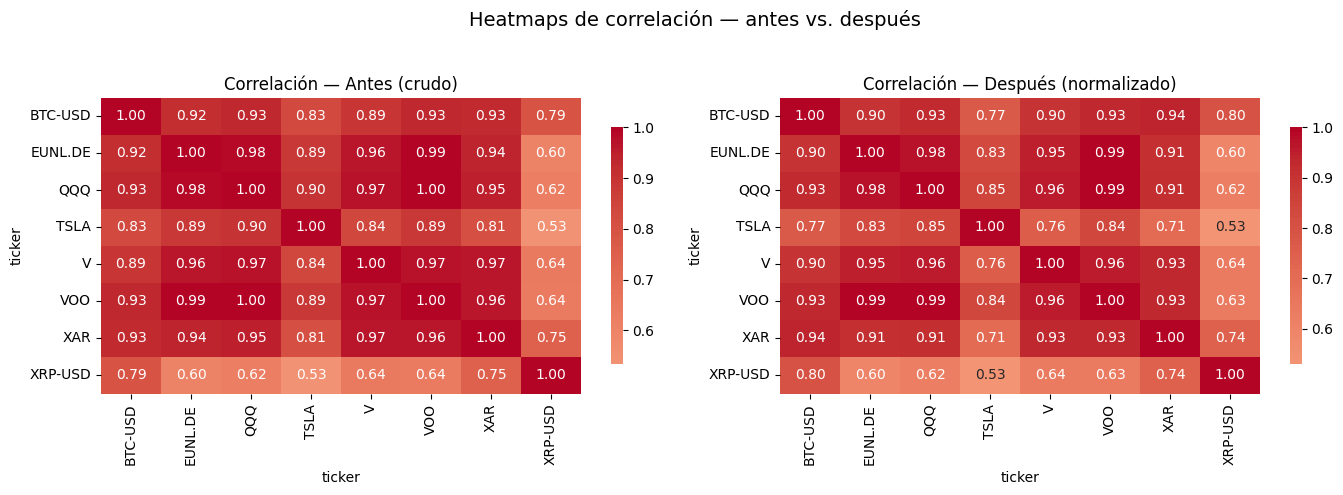

In [14]:
"""Comparativa de heatmaps de correlación antes y después de la limpieza"""

plot_before_after_corr(df_raw, market_df_clean)   